# Introduction to tensorflow
we gonna cover the following

* Intoduction
* Getting Info form tensors
* Manipulating tensors
* Tensors & Numpy
* Using @tf.function (a way to speed up regular python functions)
* Using GPU with tensorflow or TPU
* Exercises to try out

# Introduction to Tensors

In [ ]:
import tensorflow as tf
print (tf.__version__)

2.19.0


# 1.Creating tensors with `tf.constant()`

In [ ]:
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [ ]:
#check number of dimensions of tensor
scalar.ndim

0

In [ ]:
vector =tf.constant([10,10,10])
vector

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([10, 10, 10], dtype=int32)>

In [ ]:
vector.ndim

1

In [ ]:
matrix=tf.constant([[10,10],
                    [9,11]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10, 10],
       [ 9, 11]], dtype=int32)>

In [ ]:
matrix.ndim

2

In [ ]:
#float matrix

mat2= tf.constant([[3.5,6.8],
                   [2.2,5.6],
                   [1.2,7.9]],dtype=tf.float16)
mat2

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[3.5, 6.8],
       [2.2, 5.6],
       [1.2, 7.9]], dtype=float16)>

In [ ]:
mat2.ndim

2

In [ ]:
tensor =tf.constant([[[1,2,3],
                      [2,2,3]],
                     [[2,3,4],
                      [2,5,6]],
                     [[7,8,9],
                      [0,2,1]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[1, 2, 3],
        [2, 2, 3]],

       [[2, 3, 4],
        [2, 5, 6]],

       [[7, 8, 9],
        [0, 2, 1]]], dtype=int32)>

In [ ]:
tensor.ndim

3

# so far:

* scalar = single number
* vector = number with direction
* matrix = 2-dimensional array of numbers
* tensor = a n-dimensional array of numbers when n=0 it is scalar, n=1 it is vector


# 2. Creating tensors with `tf.Variable()`

In [ ]:
# creating tensor as we did above

changeable_tensor=tf.Variable([10,7])
unchangeable_tensor=tf.constant([10,7])
changeable_tensor, unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

### try `.assign()`

In [ ]:
changeable_tensor[0].assign(7)
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7], dtype=int32)>

### Creating a random tensor
they are tensors of arbitary size with random numbers
* use case to initialize random weights for NN
* `tf.random.Generator` It’s a class in TensorFlow that represents a random number generator (RNG).
* method used `tf.random.Generator.from_seed()`
* to get normal distributed random tensor `tensor_name.normal(shape=())`
* to get uniform distributed random tensor `tensor_name.uniform(shape=())`

In [ ]:
random_1= tf.random.Generator.from_seed(42)
random_1 =random_1.normal(shape=(3,2))

random_2=tf.random.Generator.from_seed(42)
random_2=random_2.normal(shape=(3,2))

random_1,random_2,random_1==random_2



(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[ True,  True],
        [ True,  True],
        [ True,  True]])>)

### Shuffle a tensor
why? so that the inherent order dosent effect model like ramen and spaghetti example

**method** = `tf.random.shuffle(tensor,seed)`

In [ ]:
not_shuffled = tf.constant([[2,8],
                            [1,7],
                            [5,6]])
not_shuffled.ndim

2

In [ ]:
not_shuffled

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[2, 8],
       [1, 7],
       [5, 6]], dtype=int32)>

In [ ]:
shuffled=tf.random.shuffle(not_shuffled)
shuffled

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[2, 8],
       [5, 6],
       [1, 7]], dtype=int32)>

## Other ways to generate Tensors

In [ ]:
# tensors of 1's
tf.ones([3,3])

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [ ]:
#tensors of 0's
tf.zeros([3,3])

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

## Converting numpy arrays to tensors
the diff is that tensors can be run on GPU computing so way faster
* X = tf.constant() #Captial case for tensor or matrix
* y = tf.constant(vector) #non capital for vector


In [ ]:
# Turn Numpy arrays to tensors
import numpy as np

numpy_a=np.arange(1,25,dtype=np.int32)
numpy_a


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [ ]:
#the dimension product should match the no of elemnts in matrix in this case 2*3*4
A =tf.constant(numpy_a,shape=(2,3,4))
A

<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]],

       [[13, 14, 15, 16],
        [17, 18, 19, 20],
        [21, 22, 23, 24]]], dtype=int32)>

# Getting Information from Tensors (Tensor Attributes)
* shape
* rank
* axis or dimension
* size
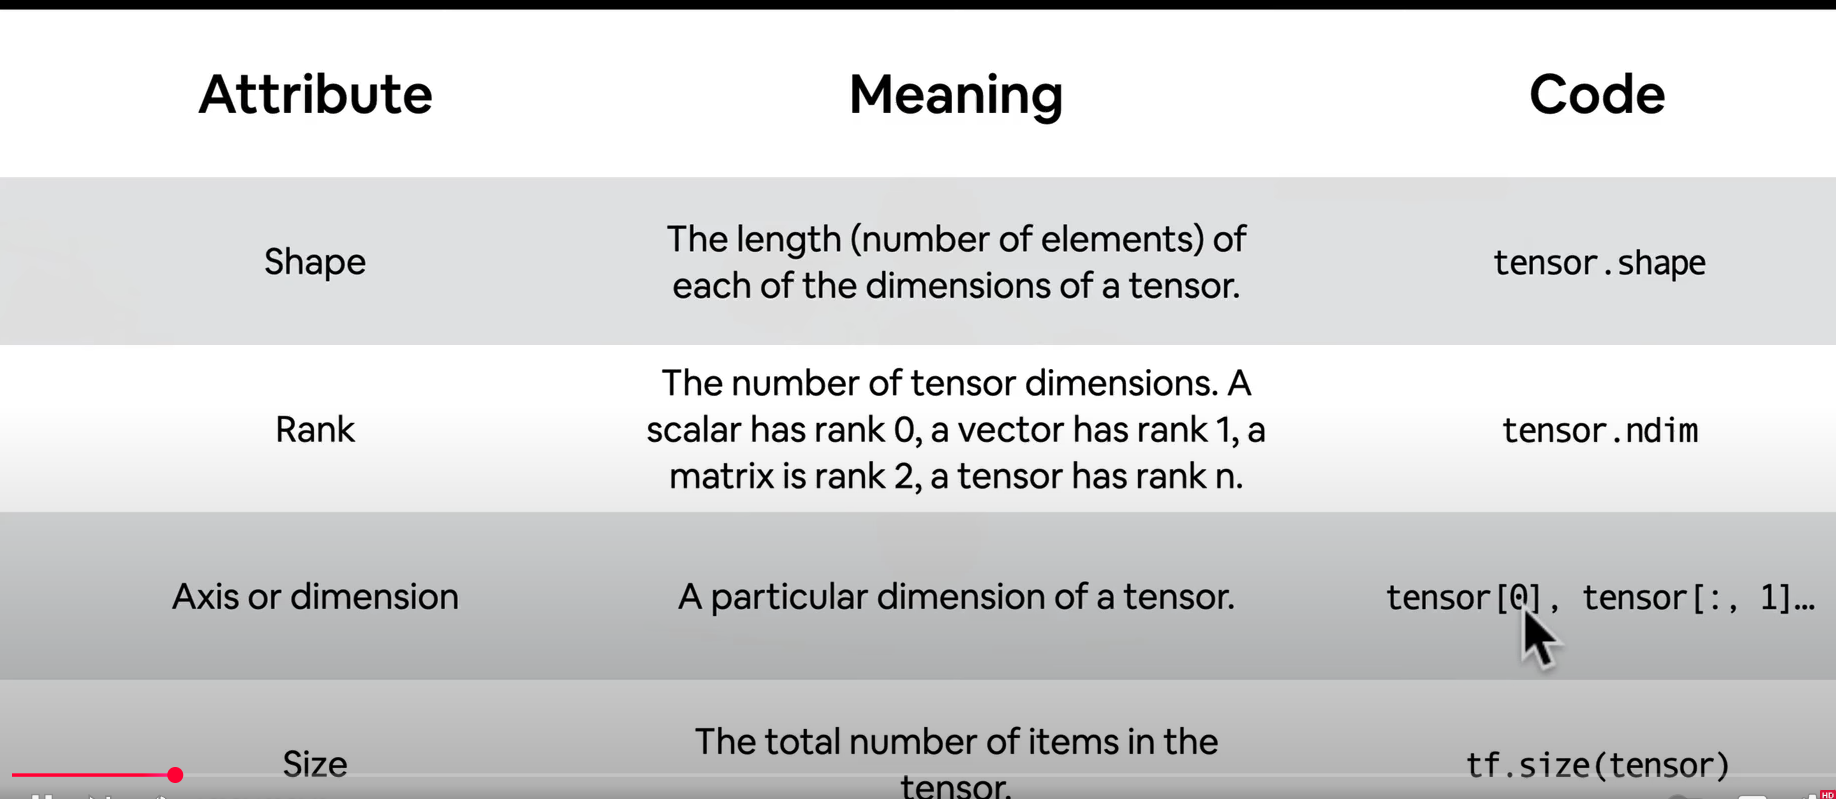

In [ ]:
#rank 4 tensor
ran_4= tf.zeros([2,3,4,5])
ran_4

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [ ]:
ran_4.ndim

4

In [ ]:
ran_4[0]

<tf.Tensor: shape=(3, 4, 5), dtype=float32, numpy=
array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]], dtype=float32)>

In [ ]:
ran_4.shape,ran_4.ndim,tf.size(ran_4)

(TensorShape([2, 3, 4, 5]), 4, <tf.Tensor: shape=(), dtype=int32, numpy=120>)

In [ ]:
# various attributes of tensor
print('Data type of tensor : ',ran_4.dtype)
print('Number of Dimensions or (rank) : ',ran_4.ndim)
print('Shape of tensor : ', ran_4.shape)
print('Elements along the 0 axis : ', ran_4.shape[0])
print('Elements along the last axis : ',ran_4.shape[-1])
print('Total number of elements in our tensor : ',tf.size(ran_4))
print('Total number of elements in our tensor : ',tf.size(ran_4).numpy())

Data type of tensor :  <dtype: 'float32'>
Number of Dimensions or (rank) :  4
Shape of tensor :  (2, 3, 4, 5)
Elements along the 0 axis :  2
Elements along the last axis :  5
Total number of elements in our tensor :  tf.Tensor(120, shape=(), dtype=int32)
Total number of elements in our tensor :  120


# Indexing Tensors

- indexing is similar to python lists


In [ ]:
#Get first 2 elements of each dimension
ran_4[:2,:2,:2,:2]

<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]]], dtype=float32)>

In [ ]:
#Get first element from each index excpet the final one
ran_4[:1,:1,:1,:]

<tf.Tensor: shape=(1, 1, 1, 5), dtype=float32, numpy=array([[[[0., 0., 0., 0., 0.]]]], dtype=float32)>


## Tensor Expand or Reshape

In [ ]:
rank_2_tensor=tf.constant([[10,7],
                          [11,2]])

In [ ]:
rank_2_tensor.ndim

2

In [ ]:
#Get last item of each row of rank 2 tensor
rank_2_tensor[:,-1]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([7, 2], dtype=int32)>

### Adding extra dimension

In [ ]:
rank_3_tensor= rank_2_tensor[...,tf.newaxis]
rank_3_tensor

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[11],
        [ 2]]], dtype=int32)>

In [ ]:
#alternative to tf.newaxis
tf.expand_dims(rank_2_tensor,axis=-1) #-1 because expand final axis

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[11],
        [ 2]]], dtype=int32)>

In [ ]:
tf.expand_dims(rank_2_tensor,axis=0) #expand on 0th axis

<tf.Tensor: shape=(1, 2, 2), dtype=int32, numpy=
array([[[10,  7],
        [11,  2]]], dtype=int32)>

# Manipulating Tensors (Tensor Operations)
**BASIC OPERATIONS**
`+`,`-`,`*`,`/`
- but original has no change so should reassign our tensor to manipulate
- we can use tensorflow builtin functions too


In [ ]:
tensor=tf.constant([[10,7],[2,3]])
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 2,  3]], dtype=int32)>

In [ ]:
tensor+10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [12, 13]], dtype=int32)>

In [ ]:
tensor-10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 0, -3],
       [-8, -7]], dtype=int32)>

In [ ]:
tensor*10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 20,  30]], dtype=int32)>

In [ ]:
tensor/10

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[1. , 0.7],
       [0.2, 0.3]])>

In [ ]:
tensor//10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 0],
       [0, 0]], dtype=int32)>

### Built-in functions

In [ ]:
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 2,  3]], dtype=int32)>

In [ ]:
tf.multiply(tensor,10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 20,  30]], dtype=int32)>

In [ ]:
tf.add(tensor,10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [12, 13]], dtype=int32)>

In [ ]:
tf.subtract(tensor,10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 0, -3],
       [-8, -7]], dtype=int32)>

In [ ]:
tf.divide(tensor,10)

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[1. , 0.7],
       [0.2, 0.3]])>

In [ ]:
tf.square(tensor)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  49],
       [  4,   9]], dtype=int32)>

# Matrix Multiplication
In machine learning Matrix Multiplication is the most common tensor operation

**RULES OF MATRIX MULTIPLICATION**
1. Inner dimensions must match
2. The resultant matrix has shape of outer dimensions

In [ ]:
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 2,  3]], dtype=int32)>

In [ ]:
tf.matmul(tensor,tensor)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[114,  91],
       [ 26,  23]], dtype=int32)>

In [ ]:
tensor*tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  49],
       [  4,   9]], dtype=int32)>

In [ ]:
# matirx multiplication with python operator "@"
tensor @ tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[114,  91],
       [ 26,  23]], dtype=int32)>

In [ ]:
#create a tensor of (3,2)
x=tf.constant([[1,2],
               [3,4],
               [6,7]])

#create another tensor of (3,2)
y=tf.constant([[2,3],
               [4,5],
               [6,7]])

x,y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [6, 7]], dtype=int32)>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[2, 3],
        [4, 5],
        [6, 7]], dtype=int32)>)

In [ ]:
#matrix mutliply of same shape
x@y

InvalidArgumentError: {{function_node __wrapped__MatMul_device_/job:localhost/replica:0/task:0/device:CPU:0}} Matrix size-incompatible: In[0]: [3,2], In[1]: [3,2] [Op:MatMul] name: 

In [ ]:
tf.matmul(x,y)

InvalidArgumentError: {{function_node __wrapped__MatMul_device_/job:localhost/replica:0/task:0/device:CPU:0}} Matrix size-incompatible: In[0]: [3,2], In[1]: [3,2] [Op:MatMul] name: 

In [ ]:
#reshape any one tensor to follow the rule of matrix multiplication

x@tf.reshape(y,shape=(2,3))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[12, 15, 18],
       [26, 33, 40],
       [47, 60, 73]], dtype=int32)>

In [ ]:
tf.matmul(x,tf.reshape(y,shape=(2,3)))


<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[12, 15, 18],
       [26, 33, 40],
       [47, 60, 73]], dtype=int32)>

In [ ]:
#can do same with transpose
y,tf.reshape(y,shape=(2,3)),tf.transpose(y)

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[2, 3],
        [4, 5],
        [6, 7]], dtype=int32)>,
 <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[2, 3, 4],
        [5, 6, 7]], dtype=int32)>,
 <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[2, 4, 6],
        [3, 5, 7]], dtype=int32)>)

# The dot product (Matrix multiplication)

you can perform matrix multiplication using

- `tf.matmul()`
- `tf.tensordot()`

In [ ]:
#perform dot product on x and y by transposing either x or y
tf.tensordot(tf.transpose(x),y,axes=1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[50, 60],
       [62, 75]], dtype=int32)>

In [ ]:
# perform matrix multiplication by transpoing y
tf.matmul(x,tf.transpose(y))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 8, 14, 20],
       [18, 32, 46],
       [33, 59, 85]], dtype=int32)>

In [ ]:
#perform matrix mul by reshaping
tf.matmul(x,tf.reshape(y,shape=(2,3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[12, 15, 18],
       [26, 33, 40],
       [47, 60, 73]], dtype=int32)>

In [ ]:
# check values of y, y reshaped , y transpose

print('Normal Y:')
print(y,"\n")

print('Reshaped Y:')
print(tf.reshape(y,shape=(2,3)),'\n')

print('Transposed Y:')
print(tf.transpose(y),'/n')

Normal Y:
tf.Tensor(
[[2 3]
 [4 5]
 [6 7]], shape=(3, 2), dtype=int32) 

Reshaped Y:
tf.Tensor(
[[2 3 4]
 [5 6 7]], shape=(2, 3), dtype=int32) 

Transposed Y:
tf.Tensor(
[[2 4 6]
 [3 5 7]], shape=(2, 3), dtype=int32) /n


In [ ]:
tf.matmul(x,tf.transpose(y))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 8, 14, 20],
       [18, 32, 46],
       [33, 59, 85]], dtype=int32)>

### generally when performing matrix multiplication you would `transpose` a tensor to satisfy matrix multiplication rule rather than `reshaping`

# Changing Data Type of tensor
- using `tf.cast(tensor,dtype=type)`

In [ ]:
b=tf.constant([[1.7,2.3],
              [3.3,6.7]])
b.dtype

tf.float32

In [ ]:
c=tf.constant([[2,3],
              [4,5]])
c.dtype

tf.int32

In [ ]:
#changing form 32 bit precision to 16 bit

d=tf.cast(b,dtype=tf.float16)
d.dtype

tf.float16

In [ ]:
#change from int32 to float32
e=tf.cast(c,dtype=tf.float32)
e.dtype
c,e

(<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[2, 3],
        [4, 5]], dtype=int32)>,
 <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[2., 3.],
        [4., 5.]], dtype=float32)>)

# Aggregating Tensors
finding
- min
- max
- avg
- absolute val
- sum

In [ ]:
d=tf.constant([[10,7],
               [2,3]])

In [ ]:
tf.abs(d)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 2,  3]], dtype=int32)>

In [ ]:
e=tf.constant(np.random.randint(0,100,size=50))
e

<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([69, 27, 87, 48, 61, 11, 60,  4, 20, 22, 32, 78, 91, 76, 43, 14, 45,
        1,  9,  0, 61, 92, 17, 21, 88, 99, 72, 53, 43, 75, 43, 13, 55, 61,
       13, 89, 51, 65, 99, 82, 27, 91, 66, 74, 90, 13, 50, 61, 26, 25])>

In [ ]:
tf.size(e),e.shape,e.ndim

(<tf.Tensor: shape=(), dtype=int32, numpy=50>, TensorShape([50]), 1)

In [ ]:
# Minimum
tf.reduce_min(e)

<tf.Tensor: shape=(), dtype=int64, numpy=0>

In [ ]:
# Maximum
tf.reduce_max(e)

<tf.Tensor: shape=(), dtype=int64, numpy=99>

In [ ]:
# Mean
tf.reduce_mean(e)

<tf.Tensor: shape=(), dtype=int64, numpy=50>

In [ ]:
# Sum
tf.reduce_sum(e)

<tf.Tensor: shape=(), dtype=int64, numpy=2513>

In [ ]:
tf.math.reduce_variance(e)
# Reduce variance works only on floating values

TypeError: Input must be either real or complex. Received integer type <dtype: 'int64'>.

In [ ]:
f=tf.cast(e,dtype=tf.float64)

In [ ]:
tf.math.reduce_variance(f)

<tf.Tensor: shape=(), dtype=float64, numpy=869.6723999999999>

In [ ]:
tf.math.reduce_std(f)

<tf.Tensor: shape=(), dtype=float64, numpy=29.490208544532198>

## Find positional maximum and minimum of tensor

In [ ]:
tf.random.set_seed(42)
f=tf.random.uniform(shape=[50])
f

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

In [ ]:
#positional max
tf.argmax(f)


<tf.Tensor: shape=(), dtype=int64, numpy=42>

In [ ]:
f[tf.argmax(f)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.967138409614563>

In [ ]:
tf.reduce_max(f)

<tf.Tensor: shape=(), dtype=float32, numpy=0.967138409614563>

In [ ]:
# positional min
tf.argmin(f)

<tf.Tensor: shape=(), dtype=int64, numpy=16>

In [ ]:
f[tf.argmin(f)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.009463667869567871>

# Squeezing a tensor
removing all 1-dimensional axes

In [ ]:
tf.random.set_seed(42)
g=tf.constant(tf.random.uniform(shape=[50]),shape=(1,1,1,1,50))
g

<tf.Tensor: shape=(1, 1, 1, 1, 50), dtype=float32, numpy=
array([[[[[0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
           0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
           0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
           0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
           0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
           0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
           0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
           0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
           0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
           0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043]]]]],
      dtype=float32)>

In [ ]:
g.shape

TensorShape([1, 1, 1, 1, 50])

In [ ]:
g_squeezed=tf.squeeze(g)
g_squeezed

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

# One-hot encoding tensors

In [ ]:
# create list of indices
categories=[0,1,2,3]
tf.one_hot(categories,depth=4)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

In [ ]:
tf.one_hot(categories,depth=4,on_value='on',off_value='off')

<tf.Tensor: shape=(4, 4), dtype=string, numpy=
array([[b'on', b'off', b'off', b'off'],
       [b'off', b'on', b'off', b'off'],
       [b'off', b'off', b'on', b'off'],
       [b'off', b'off', b'off', b'on']], dtype=object)>

# More Math operations with tensors
- squaring
- log
- square root

In [ ]:
h=tf.range(1,10)
h

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [ ]:
tf.square(h)

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([ 1,  4,  9, 16, 25, 36, 49, 64, 81], dtype=int32)>

In [ ]:
tf.sqrt(tf.cast(h,dtype=tf.float32))

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([1.       , 1.4142135, 1.7320508, 2.       , 2.236068 , 2.4494898,
       2.6457512, 2.828427 , 3.       ], dtype=float32)>

In [ ]:
#find log
tf.math.log(tf.cast(h,dtype=tf.float32))

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([0.       , 0.6931472, 1.0986123, 1.3862944, 1.609438 , 1.7917595,
       1.9459102, 2.0794415, 2.1972246], dtype=float32)>

# Tensors and Numpy
Tensorflow tensors run faster on GPU and TPU than the numpy array      

In [ ]:
# numpy to tensor
j=tf.constant(np.array([3.,7.,10.]))
j

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 3.,  7., 10.])>

In [ ]:
#tensor to numpy array
np.array(j)

array([ 3.,  7., 10.])

In [ ]:
#convert tensor to numpy
j.numpy()

array([ 3.,  7., 10.])

the default type of `numpy tensor` is `float64`
the default type of `tf.cosntant()` is `float32`

# Finding access to GPU

In [ ]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
!nvidia-smi

Sat Oct 11 07:45:40 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

**Note**: if you have Cuda enabled gpu connected tensorflow uses it whenever possible

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
pandoc set to manually installed.
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libgs9 libgs9-common libidn12
  libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0
  libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13
  lmodern poppler-data preview-latex-style rake ruby ruby-net-telnet
  ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils
  teckit tex-common tex-gyre texlive-base texlive-binaries
  texlive-fonts-recommended texlive-latex-base texlive-latex-recommended
  texlive-pictures texlive-plain-generic tipa xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto f

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp drive/My Drive/Colab Notebooks/00_tensorflow_fundamentals.ipynb ./

cp: cannot stat 'drive/My': No such file or directory
cp: cannot stat 'Drive/Colab': No such file or directory
cp: cannot stat 'Notebooks/00_tensorflow_fundamentals.ipynb': No such file or directory


In [ ]:
!cp "/content/drive/My Drive/Colab Notebooks/00_tensorflow_fundamentals.ipynb" ./


In [ ]:
!jupyter nbconvert --to pdf "00_tensorflow_fundamentals.ipynb"


[NbConvertApp] Converting notebook 00_tensorflow_fundamentals.ipynb to pdf
[NbConvertApp] Writing 147902 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 128822 bytes to 00_tensorflow_fundamentals.pdf
